In [63]:

pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install stop-words

In [66]:
import pandas as pd 
import numpy as np
#Thư viện vẽ biểu đồ
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud

import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [67]:
#Đọc file excel
df = pd.read_csv(r'E:\pythonExcel\Telco.csv')
#In 5 dòng đầu của file excel
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [68]:
#Xem thuộc tính và kiểu dữ liệu của thuộc tính
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [69]:
# Kiểm tra số lượng dòng dữ liệu bị trùng 
duplicate_rows_df = df[df.duplicated()] 
print("Số lượng dòng bị trùng: ", duplicate_rows_df.shape) 

Số lượng dòng bị trùng:  (0, 33)


In [70]:
#Vì Total Charges có kiểu dữ liệu là object nên chuyển thành kiểu dữ liệu số:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [71]:
#Kiểm tra null
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [72]:
#Vì cột Total Charges có chứa giá trị null -> tiến hành xử lí các giá trị bị null trong cột total charges
df[df['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


In [73]:
#Tạo một bảng mới để tính cột total charges. 
df['calc_charges'] = df['Monthly Charges'] * df['Tenure Months']
#Nếu total charge = NaN(not a number) thì gán cho total charges = giá trị bảng mới, ngược lại thì giữ nguyên
df['Total Charges'] = np.where(df['Total Charges'].isna() == True,df['calc_charges'], df['Total Charges'])
#Xóa giá trị bảng mới
df = df.drop(['calc_charges'], axis=1)
#Kiểm tra xem còn hàng nào NaN không
df[df['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason


In [74]:
#Thay đổi yes/no sang 0/1  
#No internet service, No phone service sang 2
df['Senior Citizen'].replace(to_replace='Yes', value=1, inplace=True)
df['Senior Citizen'].replace(to_replace='No',  value=0, inplace=True)

df['Partner'].replace(to_replace='Yes', value=1, inplace=True)
df['Partner'].replace(to_replace='No',  value=0, inplace=True)

df['Dependents'].replace(to_replace='Yes', value=1, inplace=True)
df['Dependents'].replace(to_replace='No',  value=0, inplace=True)

df['Multiple Lines'].replace(to_replace='Yes', value=1, inplace=True)
df['Multiple Lines'].replace(to_replace='No',  value=0, inplace=True)
df['Multiple Lines'].replace("No phone service", 2, inplace=True)

df['Phone Service'].replace(to_replace='Yes', value=1, inplace=True)
df['Phone Service'].replace(to_replace='No',  value=0, inplace=True)

df['Online Security'].replace(to_replace='Yes', value=1, inplace=True)
df['Online Security'].replace(to_replace='No',  value=0, inplace=True)
df['Online Security'].replace("No internet service", 2, inplace=True)

df['Online Backup'].replace(to_replace='Yes', value=1, inplace=True)
df['Online Backup'].replace(to_replace='No',  value=0, inplace=True)
df['Online Backup'].replace("No internet service", 2, inplace=True)

df['Device Protection'].replace(to_replace='Yes', value=1, inplace=True)
df['Device Protection'].replace(to_replace='No',  value=0, inplace=True)
df['Device Protection'].replace("No internet service", 2, inplace=True)

df['Tech Support'].replace(to_replace='Yes', value=1, inplace=True)
df['Tech Support'].replace(to_replace='No',  value=0, inplace=True)
df['Tech Support'].replace("No internet service", 2, inplace=True)

df['Streaming TV'].replace(to_replace='Yes', value=1, inplace=True)
df['Streaming TV'].replace(to_replace='No',  value=0, inplace=True)
df['Streaming TV'].replace("No internet service", 2, inplace=True)

df['Streaming Movies'].replace(to_replace='Yes', value=1, inplace=True)
df['Streaming Movies'].replace(to_replace='No',  value=0, inplace=True)
df['Streaming Movies'].replace("No internet service", 2, inplace=True)

df['Paperless Billing'].replace(to_replace='Yes', value=1, inplace=True)
df['Paperless Billing'].replace(to_replace='No',  value=0, inplace=True)

df['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

print("Dữ liệu sau khi sửa là:")
df.head(10)

Dữ liệu sau khi sửa là:


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,1,Mailed check,53.85,108.15,1,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,1,Electronic check,70.70,151.65,1,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,1,Electronic check,99.65,820.50,1,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,1,Electronic check,104.80,3046.05,1,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,0,Credit card (automatic),55.20,528.35,1,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,1,Electronic check,39.65,39.65,1,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,0,Mailed check,20.15,20.15,1,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,1,Electronic check,99.35,4749.15,1,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,0,Electronic check,30.20,30.20,1,1,97,2915,Competitor had better devices


In [75]:
#Loại bỏ những cột không cần thiết
df.drop(columns=['Count','Churn Value','Churn Score','CustomerID','Lat Long','Latitude','Longitude'], inplace=True)
print("Dữ liệu sau khi xử lí là: ")
df.head()

Dữ liệu sau khi xử lí là: 


,Country,State,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,Churn Reason
0,United States,California,Los Angeles,90003,Male,0,0,0,2,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,3239,Competitor made better offer
1,United States,California,Los Angeles,90005,Female,0,0,1,2,1,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,2701,Moved
2,United States,California,Los Angeles,90006,Female,0,0,1,8,1,...,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,5372,Moved
3,United States,California,Los Angeles,90010,Female,0,1,1,28,1,...,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,5003,Moved
4,United States,California,Los Angeles,90015,Male,0,0,1,49,1,...,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,5340,Competitor had better devices


In [76]:
column_names = df.columns.tolist()
print("Tên các cột sau khi xử lí là: ")
for column_name in column_names:
    print(column_name)
df.info()
# Khoảng cách giữa các tên cột
# spacing = "    "

# # In ra tên các cột với khoảng cách
# print("Tên các cột sau khi xử lí là: ")
# print(spacing.join(column_names))

Tên các cột sau khi xử lí là: 
Country
State
City
Zip Code
Gender
Senior Citizen
Partner
Dependents
Tenure Months
Phone Service
Multiple Lines
Internet Service
Online Security
Online Backup
Device Protection
Tech Support
Streaming TV
Streaming Movies
Contract
Paperless Billing
Payment Method
Monthly Charges
Total Charges
Churn Label
CLTV
Churn Reason
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            7043 non-null   object 
 1   State              7043 non-null   object 
 2   City               7043 non-null   object 
 3   Zip Code           7043 non-null   int64  
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone S

In [77]:
#Trả về số lượng cột của các kiểu dữ liệu
print(f"""Số lượng cột của từng kiểu dữ liệu là:
float: {len(df.select_dtypes('float').columns)}
int : {len(df.select_dtypes('int').columns)}
object : {len(df.select_dtypes('object').columns)}
""") 

Số lượng cột của từng kiểu dữ liệu là:
float: 2
int : 16
object : 8



In [78]:
#Tải file excel sau khi làm sạch
# df.to_csv('du_lieu_sau_khi_lam_sach.csv', index=False)

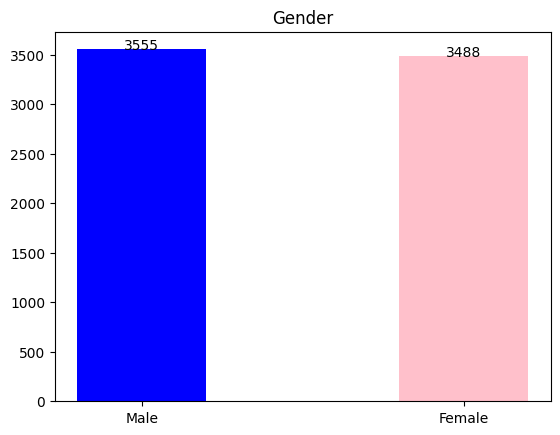

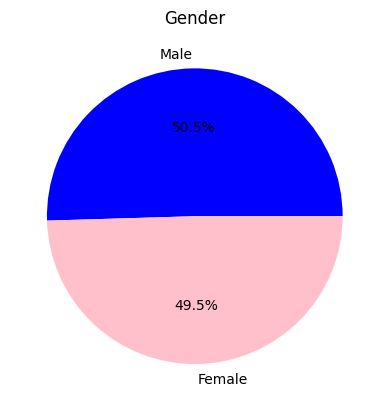

In [79]:
# Tính toán số lượng nam và nữ từ DataFrame
male_count = df[df['Gender'] == 'Male'].shape[0]
female_count = df[df['Gender'] == 'Female'].shape[0]

# Danh sách các màu cho các cột tương ứng
colors = ['blue', 'pink']

# Vẽ biểu đồ cột và chỉ định màu sắc cho từng cột
plt.bar(['Male', 'Female'], [ male_count, female_count], color=colors, width=0.4)

# Đặt tiêu đề cho biểu đồ
plt.title('Gender')

for i, count in enumerate([male_count, female_count]):
    plt.text(i, count + 0.1, str(count), ha='center')

# Hiển thị biểu đồ
plt.show()

# 
# Tạo mảng chứa số lượng nam và nữ
gender_counts = [male_count, female_count]

# Vẽ biểu đồ tròn
plt.pie(gender_counts, labels=['Male', 'Female'], colors=colors, autopct='%1.1f%%')
# autopct='%1.1f%%' định dạng hiển thị phần trăm trên mỗi phần của biểu đồ tròn.

# Đặt tiêu đề cho biểu đồ tròn
plt.title('Gender')

# Hiển thị biểu đồ
plt.show()


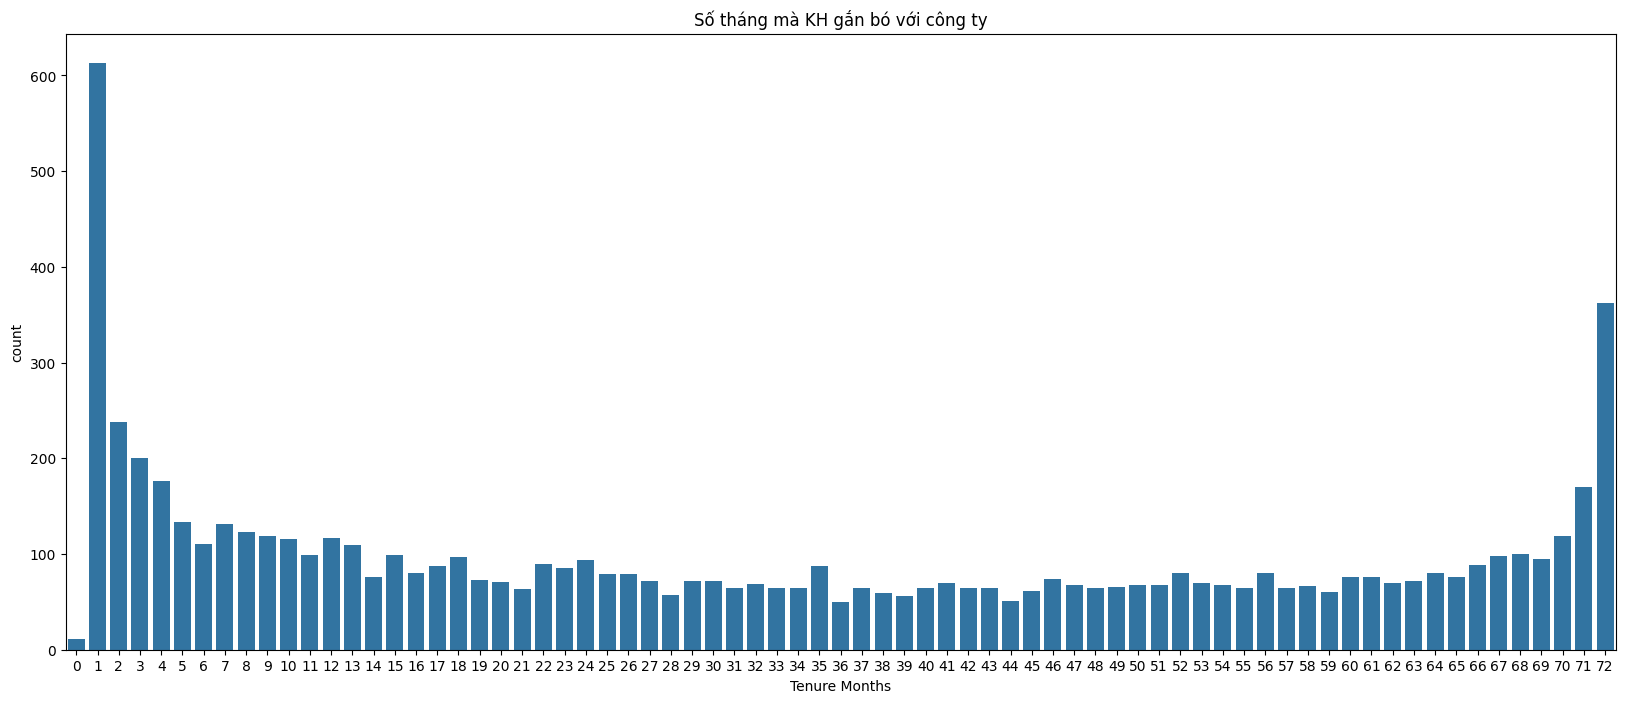

In [80]:
plt.figure(figsize=(20, 8))  # Đặt kích thước của biểu đồ rộng 20, cao 8

sns.countplot(x="Tenure Months", data=df)
plt.title("Số tháng mà KH gắn bó với công ty")

plt.show()

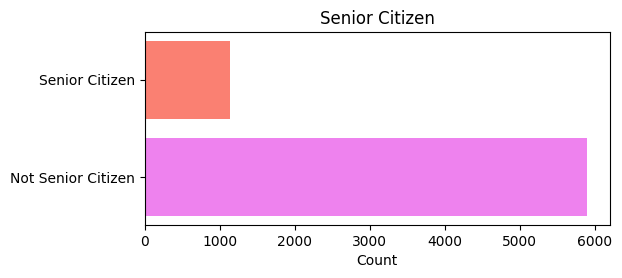

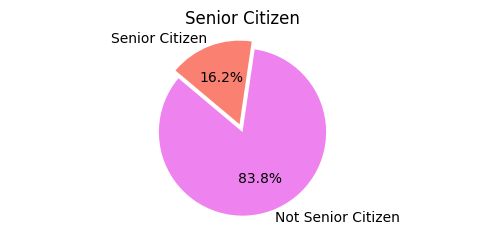

In [81]:
# Cho biết khách hàng từ 65 tuổi trở lên

# Tính tổng số lượng người cao tuổi (SeniorCitizen=1) và người không phải cao tuổi (SeniorCitizen=0)
senior_citizen_count = df['Senior Citizen'].sum()
non_senior_citizen_count = len(df) - senior_citizen_count

# Tạo danh sách chứa số lượng người cao tuổi và số lượng người không phải cao tuổi
counts = [non_senior_citizen_count, senior_citizen_count]

# Tạo danh sách nhãn cho các cột
labels = ['Not Senior Citizen', 'Senior Citizen']

# Vẽ biểu đồ cột ngang

color=['Violet', 'salmon']
plt.figure(figsize=(6, 2.5))
plt.barh(labels, counts, color=['Violet', 'salmon'])

# Đặt tiêu đề và nhãn trục
plt.title('Senior Citizen')
plt.xlabel('Count')

# 
# 
explode = (0, 0.1)  # Tách phần Senior Citizen ra một chút

# Tạo biểu đồ tròn
plt.figure(figsize=(6, 2.5))
plt.pie(counts, explode=explode, labels=labels, colors= color, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Đặt tiêu đề
plt.title('Senior Citizen')

# Hiển thị biểu đồ
plt.show()

# Hiển thị biểu đồ
plt.show()

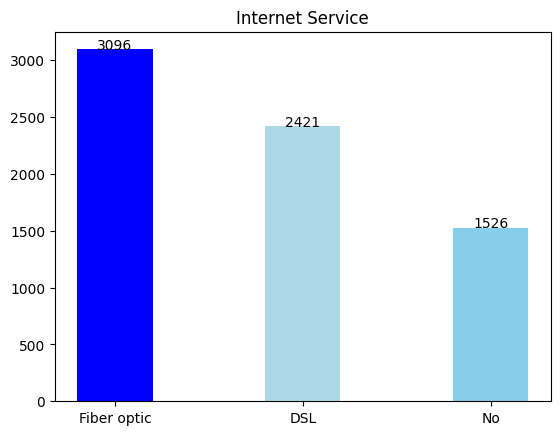

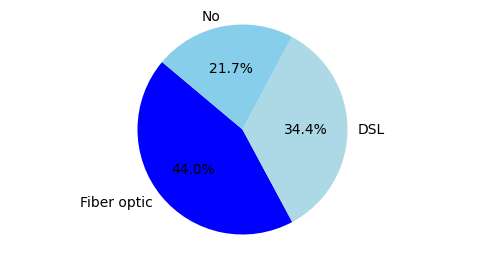

In [93]:
# Internet Service: Cho biết khách hàng có đăng ký dịch vụ Internet với công ty hay không (Fiber optic| DSL| No)
Fiber_optic_count = df[df['Internet Service'] == 'Fiber optic'].shape[0]
DSL_count = df[df['Internet Service'] == 'DSL'].shape[0]
No_count = df[df['Internet Service'] == 'No'].shape[0]

# Danh sách các màu cho các cột tương ứng
colors = ['blue', 'lightblue', 'skyblue']

# Vẽ biểu đồ cột và chỉ định màu sắc cho từng cột
plt.bar(['Fiber optic', 'DSL','No'], [ Fiber_optic_count, DSL_count,No_count], color=colors, width=0.4)

# Đặt tiêu đề cho biểu đồ
plt.title('Internet Service')

for i, count in enumerate([Fiber_optic_count, DSL_count,No_count]):
    plt.text(i, count + 0.1, str(count), ha='center')

# Hiển thị biểu đồ
plt.show()



# Tạo danh sách số lượng và nhãn
counts = [Fiber_optic_count, DSL_count, No_count]
labels = ['Fiber optic', 'DSL', 'No']

# Tạo biểu đồ tròn
explode = (0, 0, 0)  

plt.figure(figsize=(6, 3))
plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Đặt tiêu đề
plt.title('')

# Đảm bảo biểu đồ tròn
plt.axis('equal')

# Hiển thị biểu đồ tròn
plt.show()

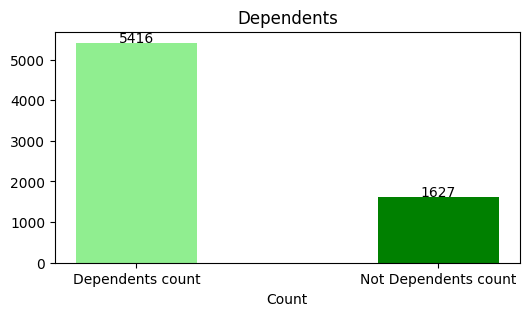

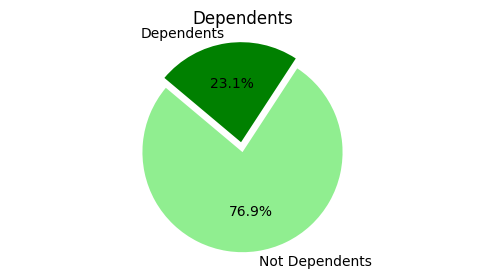

In [83]:


# Tính tổng số lượng người phụ thuộc (Dependents = 1) và người không phụ thuộc (Dependents = 0)
Dependents_count = df['Dependents'].sum()
Not_Dependents_count = len(df) - Dependents_count

# Tạo danh sách chứa số lượng người phụ thuộc và không phụ thuộc
counts = [Not_Dependents_count, Dependents_count]

# Tạo danh sách nhãn cho các cột
labels = ['Not Dependents', 'Dependents']

# Vẽ biểu đồ cột đứng
plt.figure(figsize=(6, 3))
plt.bar(['Dependents count', 'Not Dependents count'], counts, color=['lightgreen', 'green'], width=0.4)

# Đặt tiêu đề và nhãn trục
plt.title('Dependents')
plt.xlabel('Count')
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center')

# Tạo biểu đồ tròn
explode = (0, 0.1)  # Tách phần Dependents ra một chút
colors = ['lightgreen', 'green']

plt.figure(figsize=(6, 3))
plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Đặt tiêu đề
plt.title('Dependents')

# Đảm bảo biểu đồ tròn
plt.axis('equal')

# Hiển thị biểu đồ tròn
plt.show()

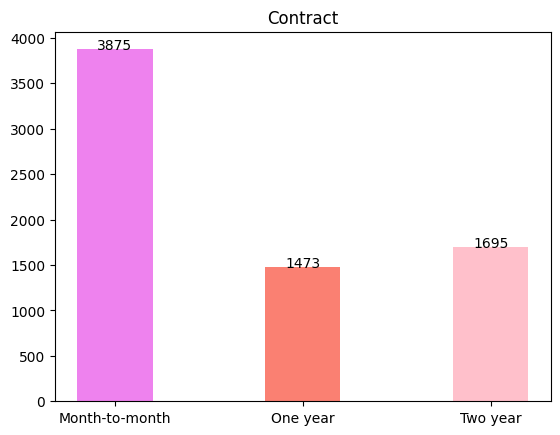

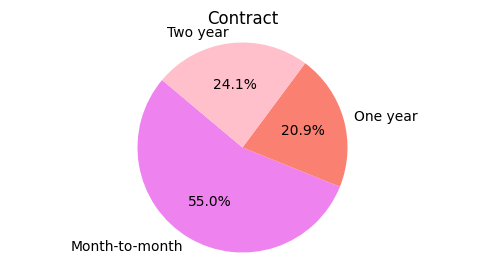

In [84]:
# Contract: Cho biết loại hợp đồng hiện tại của khách hàng (Month - to - month | one year | two years)
Month_to_month_count = df[df['Contract'] == 'Month-to-month'].shape[0]
One_year_count = df[df['Contract'] == 'One year'].shape[0]
Two_year_count = df[df['Contract'] == 'Two year'].shape[0]

# Danh sách các màu cho các cột tương ứng
colors = ['violet', 'salmon', 'pink']

# Vẽ biểu đồ cột và chỉ định màu sắc cho từng cột
plt.bar(['Month-to-month', 'One year','Two year'], [ Month_to_month_count, One_year_count,Two_year_count], color=colors, width=0.4)

# Đặt tiêu đề cho biểu đồ
plt.title('Contract')

for i, count in enumerate([Month_to_month_count, One_year_count,Two_year_count]):
    plt.text(i, count + 0.1, str(count), ha='center')

# Hiển thị biểu đồ
plt.show()



# Tạo danh sách số lượng và nhãn
counts = [Month_to_month_count, One_year_count, Two_year_count]
labels = ['Month-to-month', 'One year', 'Two year']

# Tạo biểu đồ tròn
explode = (0, 0, 0)  # Tách phần One year ra một chút

plt.figure(figsize=(6, 3))
plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Đặt tiêu đề
plt.title('Contract')

# Đảm bảo biểu đồ tròn
plt.axis('equal')

# Hiển thị biểu đồ tròn
plt.show()

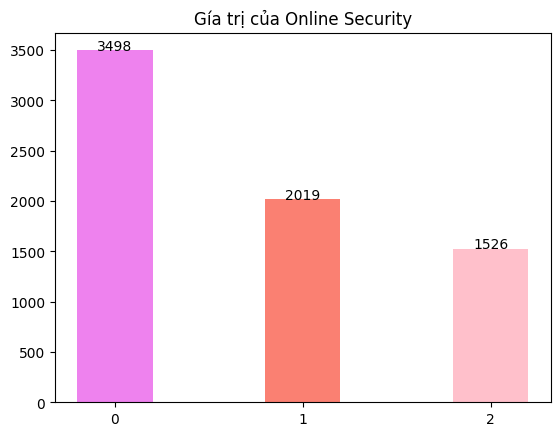

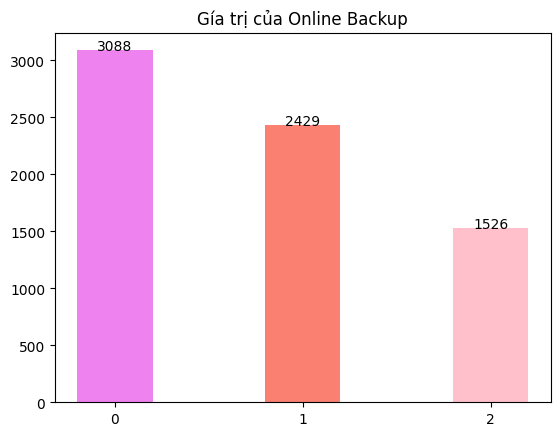

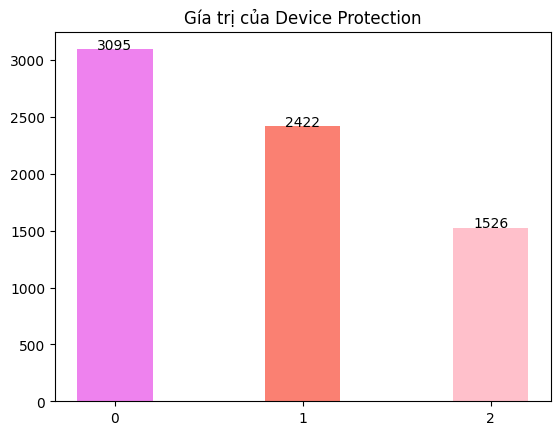

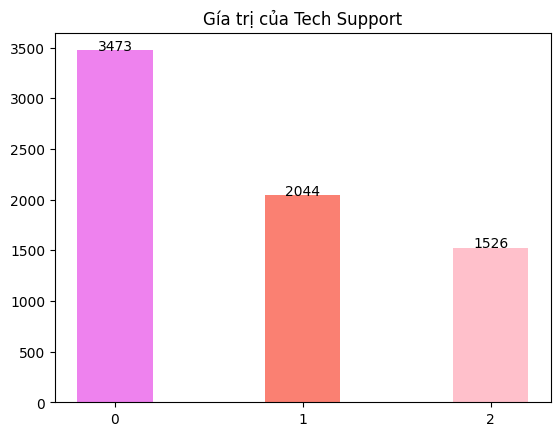

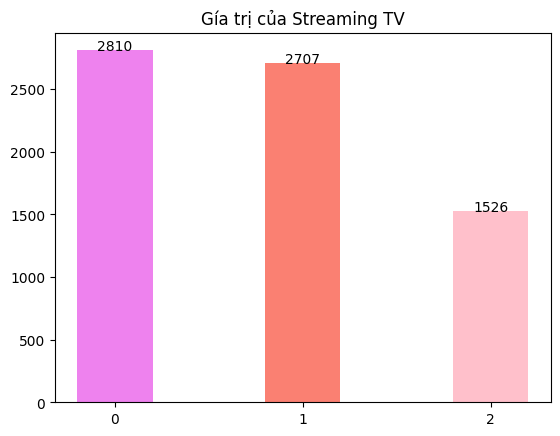

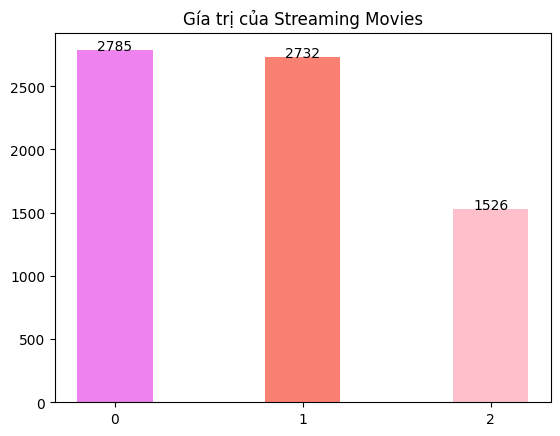

In [85]:
#Online Security: Cho biết khách hàng có đăng ký thêm dịch vụ bảo mật trực tuyến do công ty cung cấp hay không
value0_count = df[df['Online Security'] == 0].shape[0]
value1_count = df[df['Online Security'] == 1].shape[0]
value2_count = df[df['Online Security'] == 2].shape[0]

# Danh sách các màu cho các cột tương ứng
colors = ['violet', 'salmon', 'pink']

# Vẽ biểu đồ cột và chỉ định màu sắc cho từng cột
plt.bar(['0', '1','2'], [ value0_count, value1_count,value2_count], color=colors, width=0.4)

# Đặt tiêu đề cho biểu đồ
plt.title('Gía trị của Online Security')

for i, count in enumerate([value0_count, value1_count,value2_count]):
    plt.text(i, count + 0.1, str(count), ha='center')

# Hiển thị biểu đồ
plt.show()


# Online Backup: Cho biết liệu khách hàng có đăng ký thêm dịch vụ sao lưu trực tuyến do công ty cung cấp hay không
value0_count = df[df['Online Backup'] == 0].shape[0]
value1_count = df[df['Online Backup'] == 1].shape[0]
value2_count = df[df['Online Backup'] == 2].shape[0]

# Danh sách các màu cho các cột tương ứng
colors = ['violet', 'salmon', 'pink']

# Vẽ biểu đồ cột và chỉ định màu sắc cho từng cột
plt.bar(['0', '1','2'], [ value0_count, value1_count,value2_count], color=colors, width=0.4)

# Đặt tiêu đề cho biểu đồ
plt.title('Gía trị của Online Backup')

for i, count in enumerate([value0_count, value1_count,value2_count]):
    plt.text(i, count + 0.1, str(count), ha='center')

# Hiển thị biểu đồ
plt.show()

# Device Protection: KH có đăng ký gói bảo vệ thiết bị do công ty cung cấp hay không
value0_count = df[df['Device Protection'] == 0].shape[0]
value1_count = df[df['Device Protection'] == 1].shape[0]
value2_count = df[df['Device Protection'] == 2].shape[0]

# Danh sách các màu cho các cột tương ứng
colors = ['violet', 'salmon', 'pink']

# Vẽ biểu đồ cột và chỉ định màu sắc cho từng cột
plt.bar(['0', '1','2'], [ value0_count, value1_count,value2_count], color=colors, width=0.4)

# Đặt tiêu đề cho biểu đồ
plt.title('Gía trị của Device Protection')

for i, count in enumerate([value0_count, value1_count,value2_count]):
    plt.text(i, count + 0.1, str(count), ha='center')

# Hiển thị biểu đồ
plt.show()

# Tech Support: cho biết KH có sử dụng dịch vụ hỗ trợ kỹ thuật không
value0_count = df[df['Tech Support'] == 0].shape[0]
value1_count = df[df['Tech Support'] == 1].shape[0]
value2_count = df[df['Tech Support'] == 2].shape[0]

# Danh sách các màu cho các cột tương ứng
colors = ['violet', 'salmon', 'pink']

# Vẽ biểu đồ cột và chỉ định màu sắc cho từng cột
plt.bar(['0', '1','2'], [ value0_count, value1_count,value2_count], color=colors, width=0.4)

# Đặt tiêu đề cho biểu đồ
plt.title('Gía trị của Tech Support')

for i, count in enumerate([value0_count, value1_count,value2_count]):
    plt.text(i, count + 0.1, str(count), ha='center')

# Hiển thị biểu đồ
plt.show()


# Streaming TV: cho biết KH có sử dụng dịch vụ truyền hình trực tuyến không 
value0_count = df[df['Streaming TV'] == 0].shape[0]
value1_count = df[df['Streaming TV'] == 1].shape[0]
value2_count = df[df['Streaming TV'] == 2].shape[0]

# Danh sách các màu cho các cột tương ứng
colors = ['violet', 'salmon', 'pink']

# Vẽ biểu đồ cột và chỉ định màu sắc cho từng cột
plt.bar(['0', '1','2'], [ value0_count, value1_count,value2_count], color=colors, width=0.4)

# Đặt tiêu đề cho biểu đồ
plt.title('Gía trị của Streaming TV')

for i, count in enumerate([value0_count, value1_count,value2_count]):
    plt.text(i, count + 0.1, str(count), ha='center')

# Hiển thị biểu đồ
plt.show()


# Streaming Movies: cho biết KH có sử dụng dịch vụ xem phim trực tuyến không
value0_count = df[df['Streaming Movies'] == 0].shape[0]
value1_count = df[df['Streaming Movies'] == 1].shape[0]
value2_count = df[df['Streaming Movies'] == 2].shape[0]

# Danh sách các màu cho các cột tương ứng
colors = ['violet', 'salmon', 'pink']

# Vẽ biểu đồ cột và chỉ định màu sắc cho từng cột
plt.bar(['0', '1','2'], [ value0_count, value1_count,value2_count], color=colors, width=0.4)

# Đặt tiêu đề cho biểu đồ
plt.title('Gía trị của Streaming Movies')

for i, count in enumerate([value0_count, value1_count,value2_count]):
    plt.text(i, count + 0.1, str(count), ha='center')

# Hiển thị biểu đồ
plt.show()


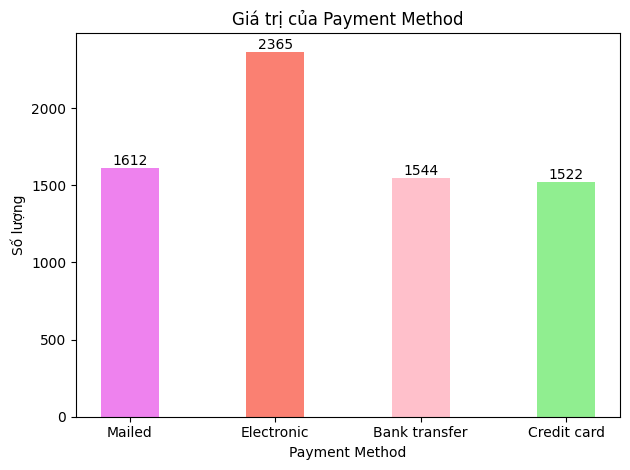

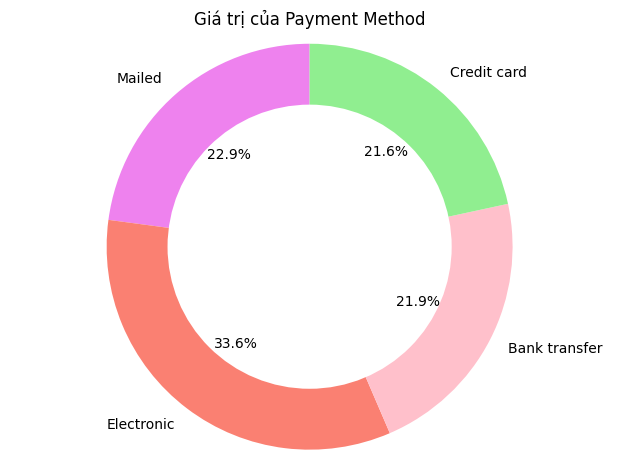

In [86]:

# Tính toán số lượng của mỗi phương thức thanh toán
value0_count = df[df['Payment Method'] == 'Mailed check'].shape[0]
value1_count = df[df['Payment Method'] == 'Electronic check'].shape[0]
value2_count = df[df['Payment Method'] == 'Bank transfer (automatic)'].shape[0]
value3_count = df[df['Payment Method'] == 'Credit card (automatic)'].shape[0]

# Tổng số lượng tất cả các phương thức thanh toán
total_count = value0_count + value1_count + value2_count + value3_count

# Tính toán tỷ lệ phần trăm của mỗi phương thức thanh toán
percentages = [value0_count / total_count * 100, value1_count / total_count * 100, value2_count / total_count * 100, value3_count / total_count * 100]

# Danh sách các màu cho các cột tương ứng
colors = ['violet', 'salmon', 'pink', 'lightgreen']

# Vẽ biểu đồ cột
fig, ax1 = plt.subplots()

payment_methods = ['Mailed', 'Electronic', 'Bank transfer', 'Credit card']
counts = [value0_count, value1_count, value2_count, value3_count]

bars = ax1.bar(payment_methods, counts, color=colors, width=0.4)

# Đặt tiêu đề và nhãn cho các trục
ax1.set_title('Giá trị của Payment Method')
ax1.set_xlabel('Payment Method')
ax1.set_ylabel('Số lượng')

# Hiển thị số lượng trên mỗi cột
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')

# # Tạo trục y thứ hai để vẽ biểu đồ đường
# ax2 = ax1.twinx()
# ax2.plot(payment_methods, percentages, color='red', marker='o', linestyle='-', label='Percentage')
# ax2.set_ylabel('Tỷ lệ phần trăm (%)')

# # Hiển thị tỷ lệ phần trăm trên biểu đồ đường
# for i, percentage in enumerate(percentages):
#     ax2.text(i, percentage + 0.1, f'{percentage:.1f}%', ha='center', va='bottom', color='red')

# # Hiển thị chú thích
# fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


# Danh sách các màu cho các cột tương ứng
colors = ['violet', 'salmon', 'pink', 'lightgreen']

# Vẽ biểu đồ tròn
plt.pie([value0_count, value1_count,value2_count,value3_count], labels=['Mailed', 'Electronic', 'Bank transfer', 'Credit card'], colors=colors, autopct='%1.1f%%', startangle=90)

# Vẽ vòng trắng (Donut chart)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Đặt tiêu đề cho biểu đồ
plt.title('Giá trị của Payment Method')

# Hiển thị biểu đồ
plt.axis('equal')
plt.tight_layout()
plt.show()

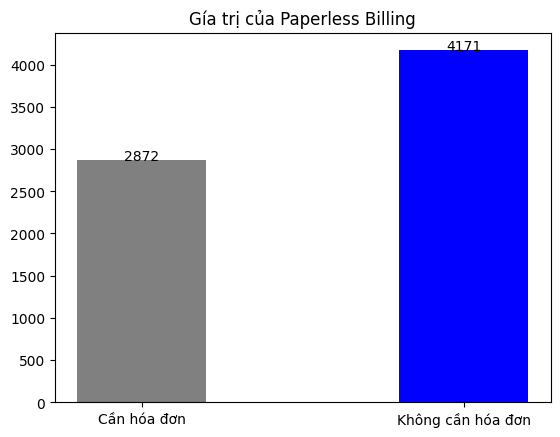

In [87]:
# Paperless Billing: Cho biết liệu khách hàng có chọn thanh toán không cần giấy tờ hay không 
value0_count = df[df['Paperless Billing'] == 0].shape[0]
value1_count = df[df['Paperless Billing'] == 1].shape[0]

# Danh sách các màu cho các cột tương ứng
colors = ['gray', 'blue']
# Vẽ biểu đồ cột và chỉ định màu sắc cho từng cột
plt.bar(['Cần hóa đơn', 'Không cần hóa đơn'], [ value0_count, value1_count], color=colors, width=0.4)

# Đặt tiêu đề cho biểu đồ
plt.title('Gía trị của Paperless Billing')

for i, count in enumerate([value0_count, value1_count]):
    plt.text(i, count + 0.1, str(count), ha='center')

# Hiển thị biểu đồ
plt.show()

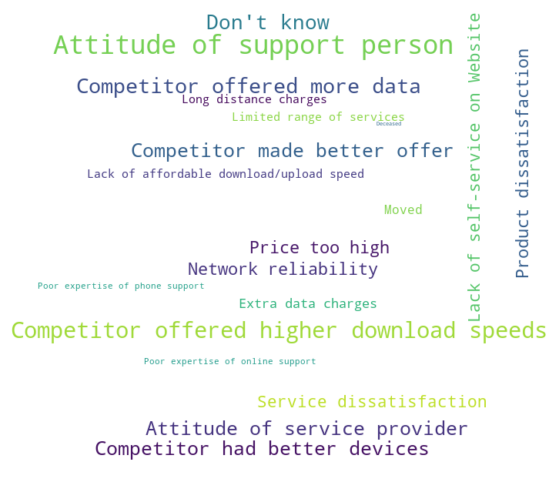

In [90]:
from wordcloud import WordCloud, STOPWORDS
from stop_words import get_stop_words

# Import stopwords tiếng Việt
stop_words = get_stop_words('vi')

# Split các lý do churn thành list
reason_list = df['Churn Reason'].str.split(', ')
all_reason = []

# Lặp qua các list lý do churn và thêm vào danh sách all_reason
for reason in reason_list:
    if isinstance(reason, list): 
        for i in reason:
            all_reason.append(i)

# Đếm số lần xuất hiện của mỗi lý do churn
actor_counts = pd.Series(all_reason).value_counts()

# Tạo WordCloud
wordcloud = WordCloud(width=700, height=600, random_state=60, background_color='white', stopwords=stop_words, max_words=40).generate_from_frequencies(actor_counts.to_dict())

# Hiển thị WordCloud
plt.figure(figsize=(7, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

machine learning

In [91]:
#  mà nó saii kkk 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Chọn các thuộc tính quan trọng
features = ['Internet Service', 'Senior Citizen', 'Contract', 'Payment Method']
X = df[features]
y = df['Kết quả']  # tên cột  muốn dự đoán
  

# Tiền xử lý dữ liệu: Chuyển đổi các biến phân loại thành dạng số 
X = pd.get_dummies(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo và huấn luyện mô hình RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_classifier.predict(X_test)

# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of RandomForestClassifier:", accuracy)

KeyError: 'Kết quả'

In [92]:
contract_list = df['Contract'].str.split(', ')
all_contract = []
for genre in contract_list:
        if isinstance(genre, list): 
            for i in genre:
                  all_contract.append(i)
genre_counts = pd.Series(all_contract).value_counts()
genre_counts

Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64